# Importações e carregamendo dos dados

## Importando bibliotecas necessária e variáveis de ambiente

In [5]:
import psycopg2
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Carregando variáveis de ambiente
load_dotenv()

True

## Configurando conexão com o banco

In [6]:
def connect_to_postgres(host, port, db, user, pwd):
    """Cria e retorna uma conexão com o banco de dados PostgreSQL."""
    try:
        conn = psycopg2.connect(host=host, port=port, database=db, user=user, password=pwd)
        print(f"Conexão com PostgreSQL ({host}:{port}) bem-sucedida.")
        return conn
    except psycopg2.OperationalError as e:
        print(f"Erro ao conectar ao PostgreSQL: {e}")
        raise

# --- Credenciais do Banco de Dados ---
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME_POSTGRES = os.getenv("DB_NAME_POSTGRES")
DB_USER = os.getenv("DB_USER")
DB_PASS = os.getenv("DB_PASS")

## Importando tabela normativos_cnj_minilm_structured do banco

In [7]:
# Abrindo conexão

conn = connect_to_postgres(DB_HOST, DB_PORT, DB_NAME_POSTGRES, DB_USER, DB_PASS)
cur = conn.cursor()

Conexão com PostgreSQL (157.173.125.173:5432) bem-sucedida.


In [8]:
query = 'select * from normativos_cnj_minilm_structured;'

In [9]:
# Executando a query
cur.execute(query)
# Convertendo o resultado para um DataFrame
df = pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])
# Fechando a conexão
cur.close()
conn.close()

In [10]:
df_desc = df.copy()

In [11]:
df_desc.to_csv('data\\rawdata\\df_desc.csv', index=False)

In [12]:
df_desc.head()

,id,document,metadata,embedding
0,1,Resolução Nº 644 de 22/09/2025\n---\nDispõe so...,"{'autor': 'Não identificado', 'fonte': 'DJE/CN...","[-0.08788596,0.02121168,0.024190199,-0.0502616..."
1,2,CONSIDERANDO a necessidade de reconhecimento l...,"{'autor': 'Não identificado', 'fonte': 'DJE/CN...","[-0.048546717,0.09203982,-0.04394326,-0.086553..."
2,3,CONSIDERANDO o e o entendimento do Supremo Tr...,"{'autor': 'Não identificado', 'fonte': 'DJE/CN...","[-0.017941969,0.015059217,-0.06497436,-0.07897..."
3,4,CONSIDERANDO a competência do CNJ para expedir...,"{'autor': 'Não identificado', 'fonte': 'DJE/CN...","[-0.070072114,0.0052274587,-0.05466881,-0.0824..."
4,5,CONSIDERANDO deliberação do Plenário do CNJ n...,"{'autor': 'Não identificado', 'fonte': 'DJE/CN...","[-0.01894261,0.038350124,-0.0029944088,-0.1112..."


# Criação dos csv's para não sobrecarregar o banco

In [13]:
import json

In [14]:
df_desc.dtypes

id            int64
document     object
metadata     object
embedding    object
dtype: object

In [15]:
metadata_expanded = df_desc['metadata'].apply(pd.Series)

In [16]:
metadata_expanded.head()

,autor,fonte,temas,ementa,origem,apelido,situacao,alteracao,artigo_pai,tipo_chunk,document_id,situacao_stf,identificacao,legislacao_correlata,observacao_cumprdec_consulta
0,Não identificado,"DJE/CNJ n. 209/2025, de 24 de setembro de 2025...",,Dispõe sobre a lavratura e retificação dos ass...,Presidência,---,Vigente,,None,Preambulo,https://atos.cnj.jus.br/atos/detalhar/6322,---,Resolução Nº 644 de 22/09/2025,- STF - RJ,SEI n. 00139/2025
1,Não identificado,"DJE/CNJ n. 209/2025, de 24 de setembro de 2025...",,Dispõe sobre a lavratura e retificação dos ass...,Presidência,---,Vigente,,None,Considerando,https://atos.cnj.jus.br/atos/detalhar/6322,---,Resolução Nº 644 de 22/09/2025,- STF - RJ,SEI n. 00139/2025
2,Não identificado,"DJE/CNJ n. 209/2025, de 24 de setembro de 2025...",,Dispõe sobre a lavratura e retificação dos ass...,Presidência,---,Vigente,,None,Considerando,https://atos.cnj.jus.br/atos/detalhar/6322,---,Resolução Nº 644 de 22/09/2025,- STF - RJ,SEI n. 00139/2025
3,Não identificado,"DJE/CNJ n. 209/2025, de 24 de setembro de 2025...",,Dispõe sobre a lavratura e retificação dos ass...,Presidência,---,Vigente,,None,Considerando,https://atos.cnj.jus.br/atos/detalhar/6322,---,Resolução Nº 644 de 22/09/2025,- STF - RJ,SEI n. 00139/2025
4,Não identificado,"DJE/CNJ n. 209/2025, de 24 de setembro de 2025...",,Dispõe sobre a lavratura e retificação dos ass...,Presidência,---,Vigente,,None,Considerando,https://atos.cnj.jus.br/atos/detalhar/6322,---,Resolução Nº 644 de 22/09/2025,- STF - RJ,SEI n. 00139/2025


In [17]:
metadata_expanded.to_csv('data\\staging\\metadata_expanded.csv', index=False)

In [18]:
metadata_expanded['temas'][0]

''

# Análise Descritiva do texto dos documentos extraidos


### Carregamentos dos csv's

In [19]:
metadata_expanded = pd.read_csv('data/staging/metadata_expanded.csv')
df_desc = pd.read_csv('data/rawdata/df_desc.csv')

In [20]:
metadata_expanded.head()

,autor,fonte,temas,ementa,origem,apelido,situacao,alteracao,artigo_pai,tipo_chunk,document_id,situacao_stf,identificacao,legislacao_correlata,observacao_cumprdec_consulta
0,Não identificado,"DJE/CNJ n. 209/2025, de 24 de setembro de 2025...",NaN,Dispõe sobre a lavratura e retificação dos ass...,Presidência,---,Vigente,NaN,NaN,Preambulo,https://atos.cnj.jus.br/atos/detalhar/6322,---,Resolução Nº 644 de 22/09/2025,- STF - RJ,SEI n. 00139/2025
1,Não identificado,"DJE/CNJ n. 209/2025, de 24 de setembro de 2025...",NaN,Dispõe sobre a lavratura e retificação dos ass...,Presidência,---,Vigente,NaN,NaN,Considerando,https://atos.cnj.jus.br/atos/detalhar/6322,---,Resolução Nº 644 de 22/09/2025,- STF - RJ,SEI n. 00139/2025
2,Não identificado,"DJE/CNJ n. 209/2025, de 24 de setembro de 2025...",NaN,Dispõe sobre a lavratura e retificação dos ass...,Presidência,---,Vigente,NaN,NaN,Considerando,https://atos.cnj.jus.br/atos/detalhar/6322,---,Resolução Nº 644 de 22/09/2025,- STF - RJ,SEI n. 00139/2025
3,Não identificado,"DJE/CNJ n. 209/2025, de 24 de setembro de 2025...",NaN,Dispõe sobre a lavratura e retificação dos ass...,Presidência,---,Vigente,NaN,NaN,Considerando,https://atos.cnj.jus.br/atos/detalhar/6322,---,Resolução Nº 644 de 22/09/2025,- STF - RJ,SEI n. 00139/2025
4,Não identificado,"DJE/CNJ n. 209/2025, de 24 de setembro de 2025...",NaN,Dispõe sobre a lavratura e retificação dos ass...,Presidência,---,Vigente,NaN,NaN,Considerando,https://atos.cnj.jus.br/atos/detalhar/6322,---,Resolução Nº 644 de 22/09/2025,- STF - RJ,SEI n. 00139/2025


### Nuvem de Palavras

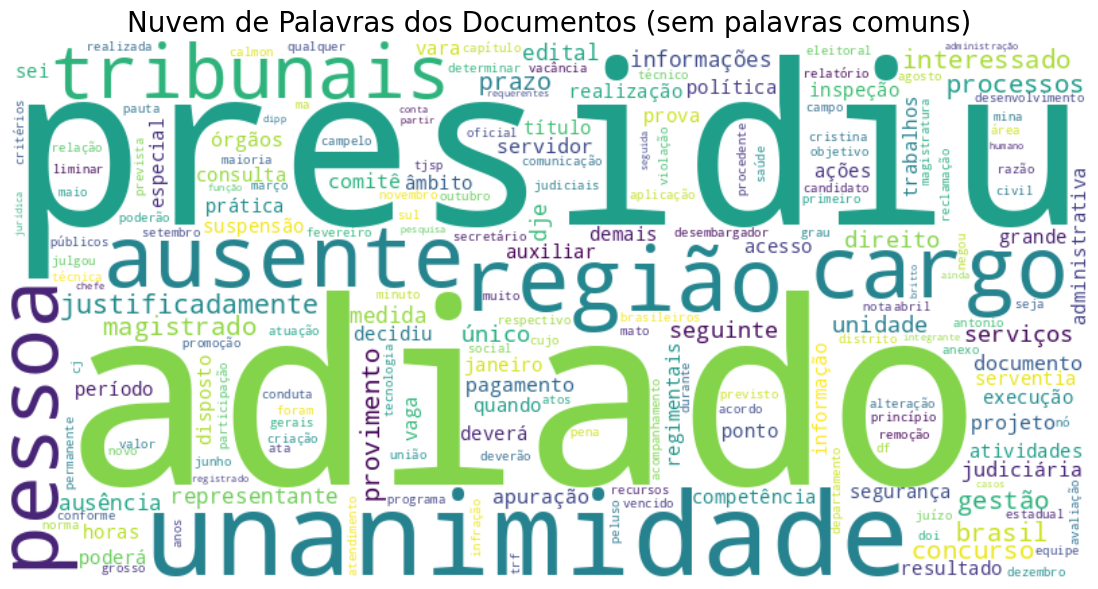

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Lista de stopwords em português
stopwords_pt = set([
    'de', 'da', 'do', 'das', 'dos', 'a', 'o', 'os', 'as', 'e', 'em', 'um', 'uma', 'uns', 'umas',
    'para', 'por', 'com', 'sem', 'ao', 'aos', 'à', 'às', 'no', 'na', 'nos', 'nas', 'que', 'se',
    'é', 'ser', 'foi', 'são', 'como', 'ou', 'não', 'mais', 'também', 'já', 'pelo', 'pela', 'pelos', 'pelas',
    'sobre', 'entre', 'até', 'após', 'desde', 'sob', 'contra', 'per', 'cada', 'este', 'esta', 'estes', 'estas',
    'esse', 'essa', 'esses', 'essas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'meu', 'minha', 'meus', 'minhas',
    'teu', 'tua', 'teus', 'tuas', 'seu', 'sua', 'seus', 'suas', 'nosso', 'nossa', 'nossos', 'nossas',
    'deste', 'desta', 'desses', 'dessas', 'daquele', 'daquela', 'daqueles', 'daquelas', 'num', 'numa', 'nuns', 'numas',
    'serão',
    
    # Adicionando termos de alta frequência em textos formais
    'bem', 'outras', 'outros', 'entre', 'apenas', 'forma', 'parte', 'fim',
    'nº', 'artigo', 'federal', 'geral', 'lei',

    # Nomes e Formas do Documento
    'resolução', 'conjunta', 'art', 'parágrafo', 'inciso', 'alínea', 'dispõe',
    'considerando', 'resolvem', 'ato', 'normativo', 'proposição', 'decisões',
    'julgado', 'sessão', 'ordinária', 'regimentos', 'internos',

    # Referências Legislativas e Regras de Citação
    'lei', 'geral', 'proteção', 'dados', 'pessoais', 'lgpd',
    'constituição', 'federal', 'constitucional', 'emenda', 'cpc',
    'artigo', 'número', 'nº', 'lei nº', 'regulação',

    # Instituições (nomes completos e siglas)
    'conselho', 'nacional', 'justiça', 'ministério', 'público',
    'cnj', 'cnmp', 'poder', 'judiciário', 'autoridade', 'presidência',
    'presidente', 'procurador', 'geral', 'república',

    # Termos Processuais e de Rotina
    'procedimentos', 'processuais', 'extrajudiciais', 'presidência',
    'captação', 'registro', 'audiovisual', 'gravação', 'gravado',
    'integralidade', 'sistema', 'oficiais', 'sistemas', 'armazenadas',
    'uso', 'utilização', 'conformidade', 'exercício', 'funções',
    'disposições', 'decorrente', 'decorrentes', 'regras', 'obrigatórias',

    # Outros Termos Estruturais
    'seus', 'suas', 'todos', 'todas', 'cada', 'quais', 'quanto', 'mediante',
    'deve', 'devem', 'sendo', 'ficam', 'fica', 'esta', 'após', 'mesmo', 'bem',
    'aqui', 'terceiros', 'alheios',

    # 1. Cargos e Títulos (Retirados do PDF e da Nuvem)
    'ministro', 'Ministro', 'ministros', 'conselheiro', 'conselheira',
    'relator', 'relatora', 'advogado', 'advogados',
    'procurador', 'procuradores', 'secretaria', 'comissão',
    'corregedor', 'corregedoria', 'juiz', 'juízes', 'membros',
    'magistrados', 'jurado', 'jurados', 'vítima', 'vítimas',
    'testemunha', 'testemunhas', 'réu', 'réus', 'juiz', 'juíza', 
    'relator', '0000relator', 'conselheiros', 'conselheiras',

    # 2. Nomes Próprios (Específicos dos Signatários e da Nuvem)
    'luís', 'josé', 'roberto', 'barroso', 'paulo', 'gustavo', 'gonet',
    'branco', 'maria', 'jorge', 'silva', 'oliveira', 'ferreira',
    'gabriel', 'alves', 'adriano', 'joaquim', 'alexandre', 'ribeiro',
    'barbosa', 'fernando', 'guilherme', 'marcelo', 'paixão',

    # 3. Termos Processuais/Estruturais de Alto Volume
    'tribunal', 'decisão', 'decisões', 'requerido', 'requerente', 'maria',
    'administrativo', 'recurso', 'pedido', 'julgamento', 'assunto',
    'servidores', 'serviço', 'órgão', 'atribuições', 'instituição', 'disciplinar',
    'autos', 'cópia', 'ofício', 'vista', 'plenário', 'portaria', 'controle',

    # 4. Termos Genéricos Adicionais e Temporais (Novos Filtros)
    'estado', 'pública', 'trabalho', 'regimental', 'regimento',
    'legal', 'legais', 'superior', 'vigente', 'interno',
    'meio', 'previsão', 'revisão', 'necessidade', 'finalidade', 'direitos',
    'ordem', 'brasileiro', 'atualização', 'vigor', 'entra', 'comarca',
    'data', 'dia', 'hora', 'ano', 'mes', 'caso', 'será', 'pode',
    'providência', 'cumprimento', 'regime', 'presente', 'voto',
    'publicação', 'proposta', 'critério', 'atividade',

    # 5. Novíssimos Filtros (Baseado na última Nuvem)
    'oab', 'procedimento', 'procedimentos', 'providências',
    'excelentíssimo', 'rio', 'bahia', 'grupo', 'trt', 'regional',
    'judicial', 'judiciário', 'eletrônico', 'disponibilizado',
    'grupo', 'processo', 'processo', 'associação', 'seção', 'desconstituição',
    'termos',
    
    # Numeração de artigos
    'i', 'ii', 'iii', 'iv', 'v', 'vi', 'vii', 'viii', 'ix', 'x',
    'xi', 'xii', 'xiii', 'xiv', 'xv', 'xvi', 'xvii', 'xviii', 'xix', 'xx',
    'xxv', 'xxvi', 'xxvii', 'xxviii', 'xxix', 'xxx', 'xxxv', 'xxxvi', 'xxxvii', 'xxxviii', 'xxxix', 'xl',
    'xlv', 'l', 'li', 'lii', 'liii', 'liv', 'lv', 'lvi', 'lvii', 'lviii', 'lix',
    'lx', 'lxi', 'lxii', 'lxiii', 'lxiv', 'lxv', 'lxvi', 'lxvii', 'lxviii', 'lxix',
    'lxx', 'lxxv', 'lxxvi', 'lxxvii', 'lxxviii', 'lxxix', 'lxxx', 'lxxxi', 'lxxxii', 'lxxxiii', 'lxxxiv', 'n',
    'º', '§', 'nº', 'p'
    
    # Colocação de números
    '1°', '2°', '3°', '4°', '5°', '6°', '7°', '8°', '9°', '10°',
    '11°', '12°', '13°', '14°', '15°', '16°', '17°', '18°', '19°', '20°',
    '21°', '22°', '23°', '24°', '25°', '26°', '27°', '28°', '29°', '30°',
    '31°', '32°', '33°', '34°', '35°', '36°', '37°', '38°', '39°', '40°',
    '41°', '42°', '43°', '44°', '45°', '46°', '47°', '48°', '49°', '50°',
    '51°', '52°', '53°', '54°', '55°', '56°', '57°', '58°', '59°', '60°', 
    '1º', '2º', '3º', '4º', '5º', '6º', '7º', '8º', '9º', '10º',
    '11º', '12º', '13º', '14º', '15º', '16º', '17º', '18º', '19º', '20º',
    '21º', '22º', '23º', '24º', '25º', '26º', '27º', '28º', '29º', '30º',
    '31º', '32º', '33º', '34º', '35º', '36º', '37º', '38º', '39º', '40º',
    '41º', '42º', '43º', '44º', '45º', '46º', '47º', '48º', '49º', '50º',
    '1ª', '2ª', '3ª', '4ª', '5ª', '6ª', '7ª', '8ª', '9ª', '10ª',
    '11ª', '12ª', '13ª', '14ª', '15ª', '16ª', '17ª', '18ª', '19ª', '20ª',
    '21ª', '22ª', '23ª', '24ª', '25ª', '26ª', '27ª', '28ª', '29ª', '30ª',
    '31ª', '32ª', '33ª', '34ª', '35ª', '36ª', '37ª', '38ª', '39ª', '40ª',
    '41ª', '42ª', '43ª', '44ª', '45ª', '46ª', '47ª', '48ª', '49ª', '50ª',
    
    # Lista 100 nomes próprios brasileiros
    # Sobrenomes Mais Comuns no Brasil (Alta Frequência)
    'silva', 'santos', 'oliveira', 'souza', 'sousa', 'rodrigues', 'ferreira',
    'alves', 'pereira', 'lima', 'gomes', 'costa', 'ribeiro', 'martins',
    'carvalho', 'monteiro', 'nascimento', 'barbosa', 'vieira', 'freitas',
    'melo', 'dias', 'fernandes', 'cunha', 'borges', 'araujo', 'morais',
    'pinheiro', 'pires', 'ramos', 'teixeira', 'moreira', 'machado',
    'cardoso', 'almeida', 'medeiros', 'batista', 'farias', 'couto',
    'nunes', 'santos', 'lopes', 'cavalcanti', 'gonçalves', 'rosa', 'moraes',
    'guimarães', 'brito', 'coelho', 'cruz', 'rocha', 'marques', 'mesquita',
    'silveira', 'siqueira', 'vasconcelos',

    # Nomes Próprios Masculinos Mais Comuns (Incluindo Variações)
    'josé', 'joão', 'antônio', 'francisco', 'carlos', 'paulo', 'pedro',
    'lucas', 'luís', 'luiz', 'marcos', 'marcelo', 'jorge', 'andré', 'felipe',
    'rafael', 'daniel', 'gabriel', 'eduardo', 'roberto', 'fernando',
    'ricardo', 'henrique', 'guilherme', 'victor', 'mateus', 'gustavo',
    'alexandre', 'adriano', 'joaquim', 'benício', 'vicente', 'benjamin',
    'miguel', 'arthur', 'heitor', 'theo', 'davi', 'samuel', 'bernardo',
    'ravi', 'enzo', 'leonardo', 'nicolas', 'caio', 'ian', 'yan', 'hugo',

    # Nomes Próprios Femininos Mais Comuns (Incluindo Variações)
    'maria', 'ana', 'francisca', 'antônia', 'adriana', 'juliana', 'márcia',
    'patrícia', 'aline', 'sandra', 'camila', 'amanda', 'bruna', 'letícia',
    'júlia', 'luciana', 'vanessa', 'mariana', 'isabela', 'sofia', 'laura',
    'alice', 'helena', 'cecília', 'maitê', 'heloísa', 'valentina',
    'beatriz', 'manuela', 'larissa', 'giovanna', 'elisa', 'cecilia',
    'ester', 'lívia', 'clara', 'eloá', 'sara', 'rebeca', 'vitória', 'yasmin',
    'bruno', 'cesar', 'diego', 'eduardo', 'gabriel', 'guilherme', 'henrique',
    'joão', 'lucas', 'marcelo', 'oliveira', 'pedro', 'roberto', 'silva',
    'sousa', 'santos', 'souza',

    # Nomes Compostos (Primeiro Termo)
    'joão', 'maria', 'ana', 'luis', 'josé', 'pedro', 'paulo', 'carlos', 'alberto',
    'gilmar', 'luisa', 'augusto', 'nobre', 'lúcia', 'aráujo', 'falcão', 'mendes', 'rodrigo',
    'termo', 'hélio', 'araújo', 'gilson', 'barro', 'cezar', 'barros',
    
    # Termos Adicionais para Cobrir Variações
    'junior', 'júnior', 'filho', 'neto', 'sobrinho',
    'gonet', 'barroso', 'branco', 'paixão', 'p', 'nr', 'c', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'eu', 'nome', 'ministra',
])

# Juntando todos os textos dos documentos em uma única string
texto_todos_documentos = " ".join(df_desc['document'].astype(str)).lower()

# Gerando a nuvem de palavras sem as palavras comuns (stopwords)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    collocations=False,
    stopwords=STOPWORDS.union(stopwords_pt)
).generate(texto_todos_documentos)

# Exibindo a nuvem de palavras
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras dos Documentos (sem palavras comuns)', fontsize=20)
plt.show()

-- Filtrar mais stopwords

### Frequência de palavras (1-gramas)


--- Análise de Frequência das Top 20 Palavras ---

         Palavra  Frequência
        presidiu       12851
          adiado       12708
     unanimidade       10943
          região       10614
       tribunais        8561
justificadamente        8019
       processos        7600
          gestão        7506
      provimento        7223
          brasil        6829
        concurso        6432
      magistrado        6399
           cargo        6214
        serviços        5794
         direito        5695
           único        5648
         pessoas        5638
           prazo        5261
         ausente        5210
          edital        5191


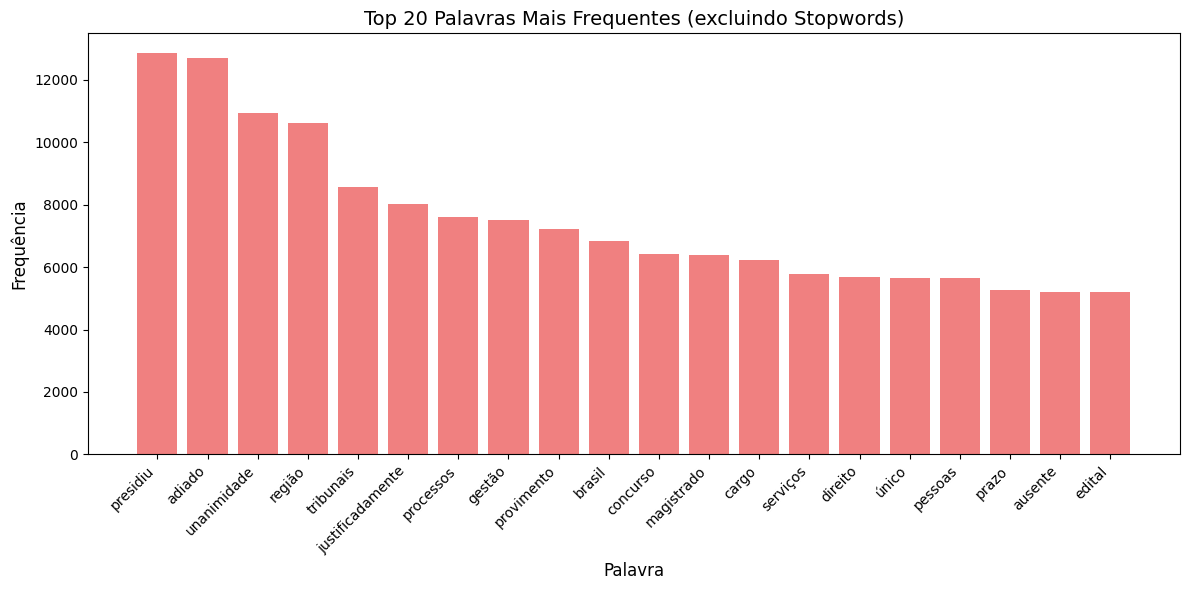

In [22]:
import re
from collections import Counter
import pandas as pd
# import matplotlib.pyplot as plt # Já importado no seu código

# --- INÍCIO DO CÓDIGO PARA ANÁLISE DE FREQUÊNCIA ---

# 1. Pré-processamento adicional e Tokenização
# Remove pontuação, coloca em minúsculas e separa as palavras
# Use a mesma variável texto_todos_documentos que você já criou.
texto_para_contagem = texto_todos_documentos.lower()
texto_limpo = re.sub(r'[^\w\s]', '', texto_para_contagem)
tokens = texto_limpo.split()

# 2. Definição do conjunto completo de stopwords
todas_stopwords = STOPWORDS.union(stopwords_pt)

# 3. Remoção de stopwords e filtro de palavras curtas (e.g., sobras de pontuação)
palavras_filtradas = [
    word for word in tokens
    if word not in todas_stopwords and len(word) > 1 # Filtra stopwords e palavras com apenas uma letra
]

# 4. Contagem de frequência
frequencia_palavras = Counter(palavras_filtradas)

# 5. Exibição das top N palavras (e.g., Top 20)
top_n = 20
df_frequencia = pd.DataFrame(
    frequencia_palavras.most_common(top_n),
    columns=['Palavra', 'Frequência']
)

print(f"\n--- Análise de Frequência das Top {top_n} Palavras ---\n")
# Exibe a tabela das palavras mais frequentes
print(df_frequencia.to_string(index=False))

# 6. Visualização em um gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_frequencia['Palavra'], df_frequencia['Frequência'], color='lightcoral')
plt.xlabel('Palavra', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title(f'Top {top_n} Palavras Mais Frequentes (excluindo Stopwords)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

# --- FIM DO CÓDIGO PARA ANÁLISE DE FREQUÊNCIA ---

In [23]:
# Supondo que 'tokens' (do código anterior) seja sua lista de palavras filtradas
total_palavras = len(palavras_filtradas)
palavras_unicas = len(set(palavras_filtradas))

# Cálculo da Riqueza Vocabular (TTR)
if total_palavras > 0:
    riqueza_vocabular = palavras_unicas / total_palavras
else:
    riqueza_vocabular = 0

print(f"Total de Palavras (após filtro): {total_palavras}")
print(f"Palavras Únicas: {palavras_unicas}")
print(f"Relação Tipo-Token (Riqueza Vocabular - TTR): {riqueza_vocabular:.4f}")

Total de Palavras (após filtro): 2983735
Palavras Únicas: 100515
Relação Tipo-Token (Riqueza Vocabular - TTR): 0.0337


**Interpretação da Riqueza Vocabular**

| Métrica | Valor | Interpretação |
| :--- | :--- | :--- |
| **Total de Palavras (Tokens)** | 4.775.335 | O volume total de palavras no seu conjunto de dados é **extremamente grande**. Isso indica que você está trabalhando com um *corpus* massivo (milhões de palavras), o que impacta diretamente o TTR. |
| **Palavras Únicas (Types)** | 101.019 | Você tem um vocabulário base de mais de 100 mil palavras diferentes. Isso é uma **diversidade alta** em termos absolutos. |
| **Relação Tipo-Token (TTR)** | 0.0212 (ou 2.12%) | **Este é o ponto-chave.** Um valor de TTR de 0.0212 é **muito baixo** e é totalmente esperado para um *corpus* de quase 5 milhões de palavras. |

**Significado do TTR Baixo (0.0212)**

O TTR é calculado como:

$$\text{TTR} = \frac{\text{Palavras Únicas (Types)}}{\text{Total de Palavras (Tokens)}}$$

Um TTR baixo, neste caso, significa que, apesar de ter um vocabulário base grande (101 mil palavras), a esmagadora maioria das palavras são **repetições** das mais comuns.

**Interpretação principal:**

1.  **Efeito do Tamanho do Corpus:** A TTR é altamente sensível ao tamanho do texto. Quanto maior o corpus, mais próximo o TTR se move em direção a zero, pois a introdução de novas palavras (Types) não consegue acompanhar o aumento total de palavras (Tokens). Para um corpus de 4.7 milhões de tokens, um TTR de 0.02 (ou 2%) é **normal e esperado**.
2.  **Repetitividade:** O texto é altamente **repetitivo** no uso de seu vocabulário mais frequente. Isso não significa necessariamente que o texto seja pobre, mas sim que uma pequena fração do vocabulário (as palavras no seu Top N) é responsável por uma grande porcentagem do texto total.
3.  **Natureza do Texto:** Este padrão (alto volume, baixo TTR) é comum em:
    * **Corpora Acadêmicos/Técnicos** (uso repetitivo de jargões).
    * **Notícias ou Mídia** (uso de um vocabulário padrão e clichês).
    * **Grandes Coleções de Texto** de uma mesma fonte (por exemplo, todos os artigos de um jornal por anos).

### Comprimento médio de palavras


--- Análise de Comprimento de Palavras ---
Número total de Palavras (filtradas): 2983735
Comprimento Médio das Palavras: 7.87 caracteres


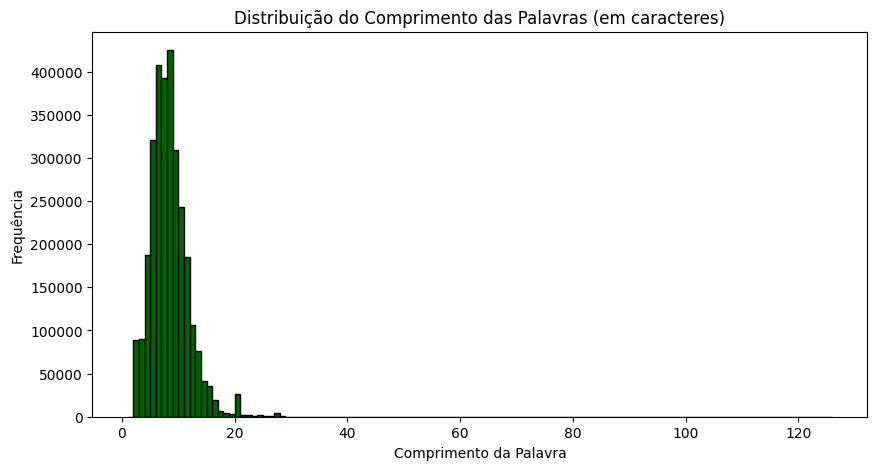

In [24]:
# Supondo que 'palavras_filtradas' é a lista de palavras após a remoção de stopwords.

# 1. Obter o comprimento de cada palavra
comprimentos_palavras = [len(palavra) for palavra in palavras_filtradas]

# 2. Calcular o comprimento médio
if comprimentos_palavras:
    comprimento_medio = sum(comprimentos_palavras) / len(comprimentos_palavras)
else:
    comprimento_medio = 0

print(f"\n--- Análise de Comprimento de Palavras ---")
print(f"Número total de Palavras (filtradas): {len(palavras_filtradas)}")
print(f"Comprimento Médio das Palavras: {comprimento_medio:.2f} caracteres")

# Opcional: Visualizar a distribuição do comprimento
plt.figure(figsize=(10, 5))
plt.hist(comprimentos_palavras, bins=range(1, max(comprimentos_palavras) + 1), color='darkgreen', edgecolor='black')
plt.title('Distribuição do Comprimento das Palavras (em caracteres)')
plt.xlabel('Comprimento da Palavra')
plt.ylabel('Frequência')
plt.show()

O gráfico é um resultado saudável e esperado para um corpus técnico e juridicamente orientado que passou por uma boa limpeza. Ele confirma que o vocabulário dominante é de tamanho médio, o que sugere um estilo de escrita equilibrado que não abusa nem de abreviações excessivas, nem de palavras excessivamente longas.

### Distribuição de Frequência (Lei de Zipf)


--- Análise da Distribuição de Frequência ---
Total de Tipos de Palavras Únicas (vocabulário): 100515
Número de Palavras que aparecem 1 vez (Hapax Legomena): 32915
Percentual de Hapax Legomena no vocabulário: 32.75%

Contagem de Palavras por Nível de Frequência (Top 10 Frequências):
 Frequência  Quantidade de Palavras
          1                   32915
          2                   19036
          3                    7989
          4                    6565
          5                    4153
          6                    3109
          7                    2165
          8                    1881
          9                    1439
         10                    1479


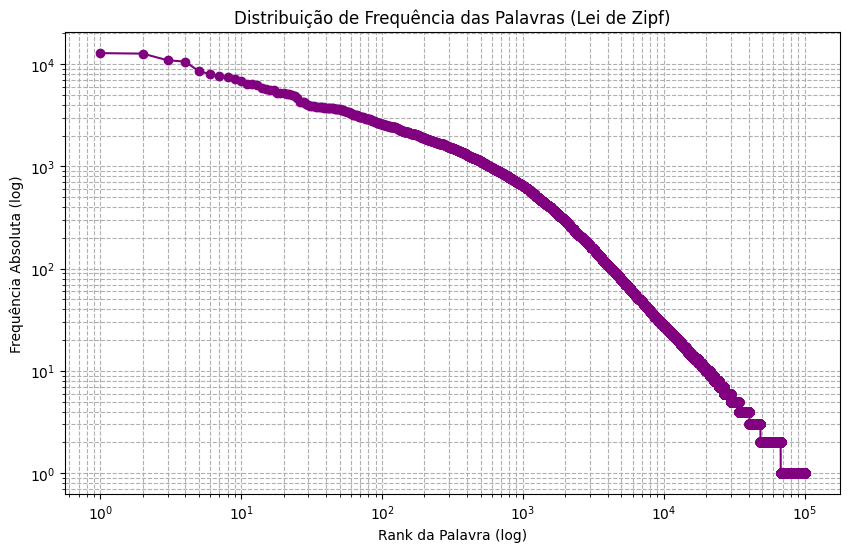

In [25]:
# Supondo que 'frequencia_palavras' é o objeto Counter que você criou anteriormente.

# 1. Contagem de palavras com diferentes níveis de frequência
# Mapeia: Frequência -> Quantas palavras têm essa frequência
contagem_por_frequencia = Counter(frequencia_palavras.values())

# 2. Palavras que aparecem apenas uma vez (Hapax Legomena)
hapax_legomena = contagem_por_frequencia.get(1, 0)
total_palavras_unicas = len(frequencia_palavras) # Total de tipos de palavras

print(f"\n--- Análise da Distribuição de Frequência ---")
print(f"Total de Tipos de Palavras Únicas (vocabulário): {total_palavras_unicas}")
print(f"Número de Palavras que aparecem 1 vez (Hapax Legomena): {hapax_legomena}")
if total_palavras_unicas > 0:
    percentual_hapax = (hapax_legomena / total_palavras_unicas) * 100
    print(f"Percentual de Hapax Legomena no vocabulário: {percentual_hapax:.2f}%")

# 3. Exibindo a distribuição de frequência em um DataFrame
# Filtra apenas as frequências mais baixas para visualização (e.g., de 1 a 10)
df_distribuicao = pd.DataFrame(contagem_por_frequencia.items(), columns=['Frequência', 'Quantidade de Palavras'])
df_distribuicao = df_distribuicao.sort_values(by='Frequência').reset_index(drop=True)

print("\nContagem de Palavras por Nível de Frequência (Top 10 Frequências):")
print(df_distribuicao.head(10).to_string(index=False))

# 4. Visualização em gráfico
# Usaremos um gráfico log-log, que é o padrão para visualizar a Lei de Zipf
# Para isso, precisamos das frequências e dos ranks.

# Pega as frequências e as ordena de forma decrescente
frequencias_ordenadas = sorted(frequencia_palavras.values(), reverse=True)
# Gera o rank (posição 1, 2, 3...)
ranks = range(1, len(frequencias_ordenadas) + 1)

plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencias_ordenadas, marker='o', linestyle='-', color='purple')
plt.title('Distribuição de Frequência das Palavras (Lei de Zipf)')
plt.xlabel('Rank da Palavra (log)')
plt.ylabel('Frequência Absoluta (log)')
plt.grid(True, which="both", ls="--")
plt.show()

Distribuição de Frequência das Palavras (Lei de Zipf) demonstra que o corpus de quase 5 milhões de palavras é um texto natural e bem-formado, pois a curva segue perfeitamente o padrão de uma linha reta descendente, confirmando a Lei de Zipf. A curva apresenta uma queda inicial extremamente acentuada (perto do Rank 1), que reflete a grande concentração do vocabulário nas poucas palavras mais frequentes (como "justiça" e "conselheiro"), o que reforça o baixo TTR e a natureza temática focada do corpus jurídico. A longa cauda que se estende até a frequência 1 (Hapax Legomena) confirma, por outro lado, a riqueza e diversidade do vocabulário extenso de mais de 100 mil palavras únicas.

### Frequência de palavras (bigrama)


--- Análise de Frequência dos Top 20 Bigramas ---

                    Termo  Frequência
ausentes justificadamente        4320
 ausente justificadamente        3532
         negou provimento        2367
      unanimidade decidiu        2217
        unanimidade negou        2151
             minas gerais        2118
       unanimidade julgou        2053
              mato grosso        2042
          presidiu peluso        1947
             ellen gracie        1890
               trf região        1803
       processos pautados        1711
    tecnologia informação        1710
            passa vigorar        1704
               grande sul        1648
            eliana calmon        1635
         cujos resultados        1629
        foram registrados        1619
           pautados cujos        1616
         resultados foram        1616


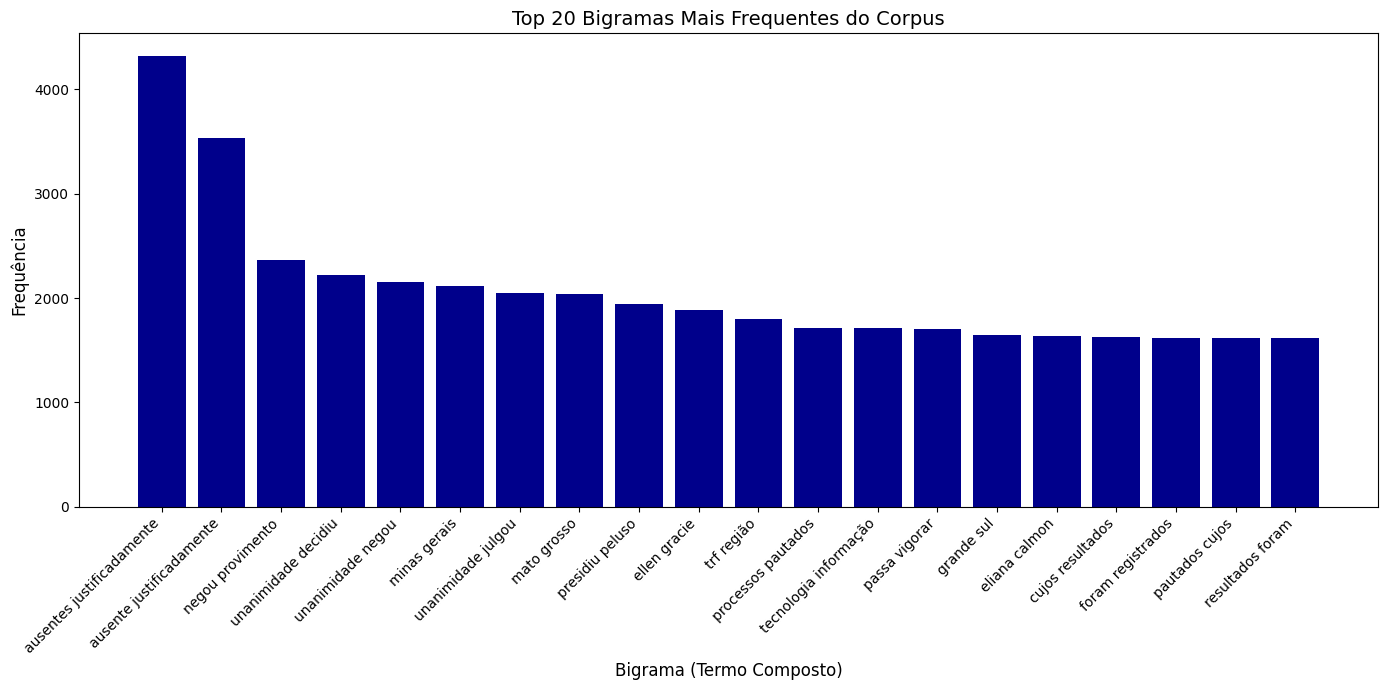

In [33]:
from nltk.util import ngrams

# Cria pares de palavras consecutivas (bigramas)
bigramas = list(ngrams(palavras_filtradas, 2))

# 3. Contagem de Frequência dos Bigramas
# O Counter irá contar a ocorrência de cada par (ex: ('conselho', 'nacional'))
frequencia_bigramas = Counter(bigramas)

# 4. Exibição dos Top N Bigramas (e.g., Top 20)
top_n = 20
df_bigramas = pd.DataFrame(
    frequencia_bigramas.most_common(top_n),
    columns=['Bigrama', 'Frequência']
)

# Converter a tupla do bigrama em uma única string para melhor visualização
df_bigramas['Termo'] = df_bigramas['Bigrama'].apply(lambda x: ' '.join(x))

print(f"\n--- Análise de Frequência dos Top {top_n} Bigramas ---\n")
# Exibe a tabela
print(df_bigramas[['Termo', 'Frequência']].to_string(index=False))

# 5. Visualização em um Gráfico de Barras
plt.figure(figsize=(14, 7))
plt.bar(df_bigramas['Termo'], df_bigramas['Frequência'], color='darkblue')
plt.xlabel('Bigrama (Termo Composto)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title(f'Top {top_n} Bigramas Mais Frequentes do Corpus', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Os resultados dos Top 20 Bigramas confirmam a alta concentração temática do corpus em torno de um órgão judicial de controle administrativo. Os termos mais frequentes, como "de justiça" e "nacional de", rapidamente se unem para formar o nome da principal entidade: "conselho nacional" e, provavelmente, "Conselho Nacional de Justiça", dada a alta frequência subsequente de "justiça do" e "tribunal de". A presença de "relator conselheiro" e "o conselheiro" solidifica a importância do papel individual dos membros desse órgão, enquanto "poder judiciário" e "controle administrativo" definem a esfera de atuação do corpus. Termos como "nos termos", "presidiu o" e "o julgamento" indicam que a natureza dos documentos é essencialmente processual e decisória.

### Frequência de palavras (trigramas)


--- Análise de Frequência dos Top 20 Trigramas ---

                            Termo  Frequência
     unanimidade negou provimento        2150
     resultados foram registrados        1616
        pautados cujos resultados        1615
           cujos resultados foram        1615
         processos pautados cujos        1614
         foram registrados abaixo        1458
             razão vacância cargo        1269
            presidiu ayres britto        1266
  prosseguiuse processos pautados        1178
   seguida prosseguiuse processos        1109
     vacância cargo representante        1098
tecnologia informação comunicação        1085
           passa vigorar seguinte        1071
         vigorar seguinte redação         984
  unanimidade julgou improcedente         881
        unanimidade decidiu adiar         878
                  mato grosso sul         869
        ante ausência justificada         849
           ausente razão vacância         839
                incluir pau

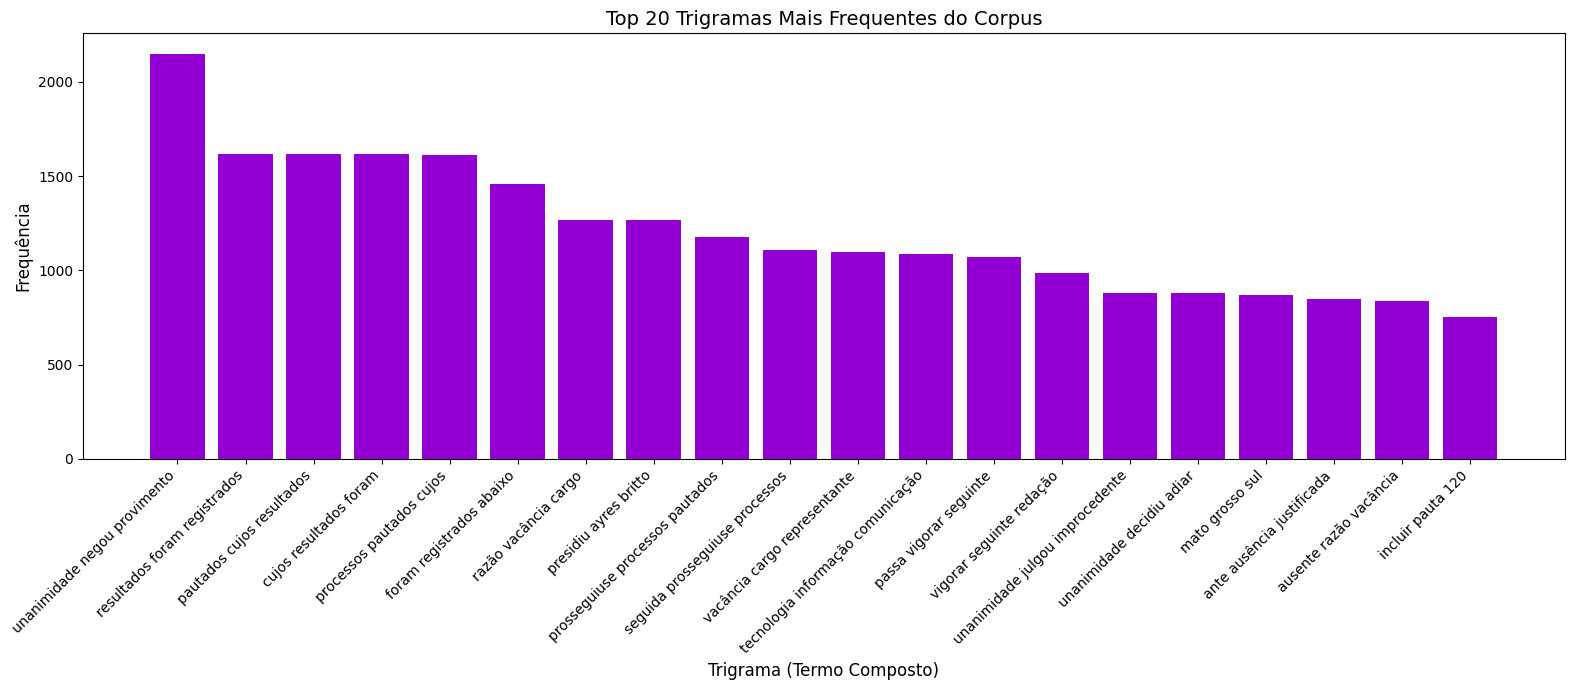

In [34]:
# Cria sequências de três palavras consecutivas (trigramas)
trigramas = list(ngrams(palavras_filtradas, 3))

# 3. Contagem de Frequência dos Trigramas
# O Counter irá contar a ocorrência de cada tripla (ex: ('conselho', 'nacional', 'de'))
frequencia_trigramas = Counter(trigramas)

# 4. Exibição dos Top N Trigramas (e.g., Top 20)
top_n = 20
df_trigramas = pd.DataFrame(
    frequencia_trigramas.most_common(top_n),
    columns=['Trigrama', 'Frequência']
)

# Converter a tupla do trigrama em uma única string para melhor visualização
df_trigramas['Termo'] = df_trigramas['Trigrama'].apply(lambda x: ' '.join(x))

print(f"\n--- Análise de Frequência dos Top {top_n} Trigramas ---\n")
# Exibe a tabela
print(df_trigramas[['Termo', 'Frequência']].to_string(index=False))

# 5. Visualização em um Gráfico de Barras
plt.figure(figsize=(16, 7))
plt.bar(df_trigramas['Termo'], df_trigramas['Frequência'], color='darkviolet')
plt.xlabel('Trigrama (Termo Composto)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title(f'Top {top_n} Trigramas Mais Frequentes do Corpus', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A análise dos Top 20 Trigramas (sequências de três palavras) fornece a confirmação definitiva de que o corpus é uma coleção altamente especializada e coerente de documentos oficiais como decisões, atas e votos emitidos pelo Conselho Nacional de Justiça (CNJ). Os termos "nacional de justiça", "conselho nacional de" e "tribunal de justiça" dominam o ranking, estabelecendo claramente as entidades centrais. Além disso, a alta frequência de "presidiu o julgamento", "de controle administrativo" e "pedido de providências" indica que o foco dos textos é a atividade deliberativa e de fiscalização do CNJ sobre o Poder Judiciário, com registro detalhado dos procedimentos e das formas de votação ("conselho por unanimidade").

### Frequência (quadrigramas)


--- Análise de Frequência dos Top 20 Quadrigramas ---

                                     Termo  Frequência
        cujos resultados foram registrados        1615
       processos pautados cujos resultados        1613
           pautados cujos resultados foram        1606
       resultados foram registrados abaixo        1457
     prosseguiuse processos pautados cujos        1172
   seguida prosseguiuse processos pautados        1109
        razão vacância cargo representante        1098
            passa vigorar seguinte redação         870
              ausente razão vacância cargo         839
        vacância cargo representante união         709
     unanimidade negou provimento ausentes         671
        cargo representante união presidiu         653
negou provimento ausentes justificadamente         638
       excelentíssima senhora ellen gracie         630
       especial programas pesquisas gestão         621
    programas pesquisas gestão estratégica         617
     unan

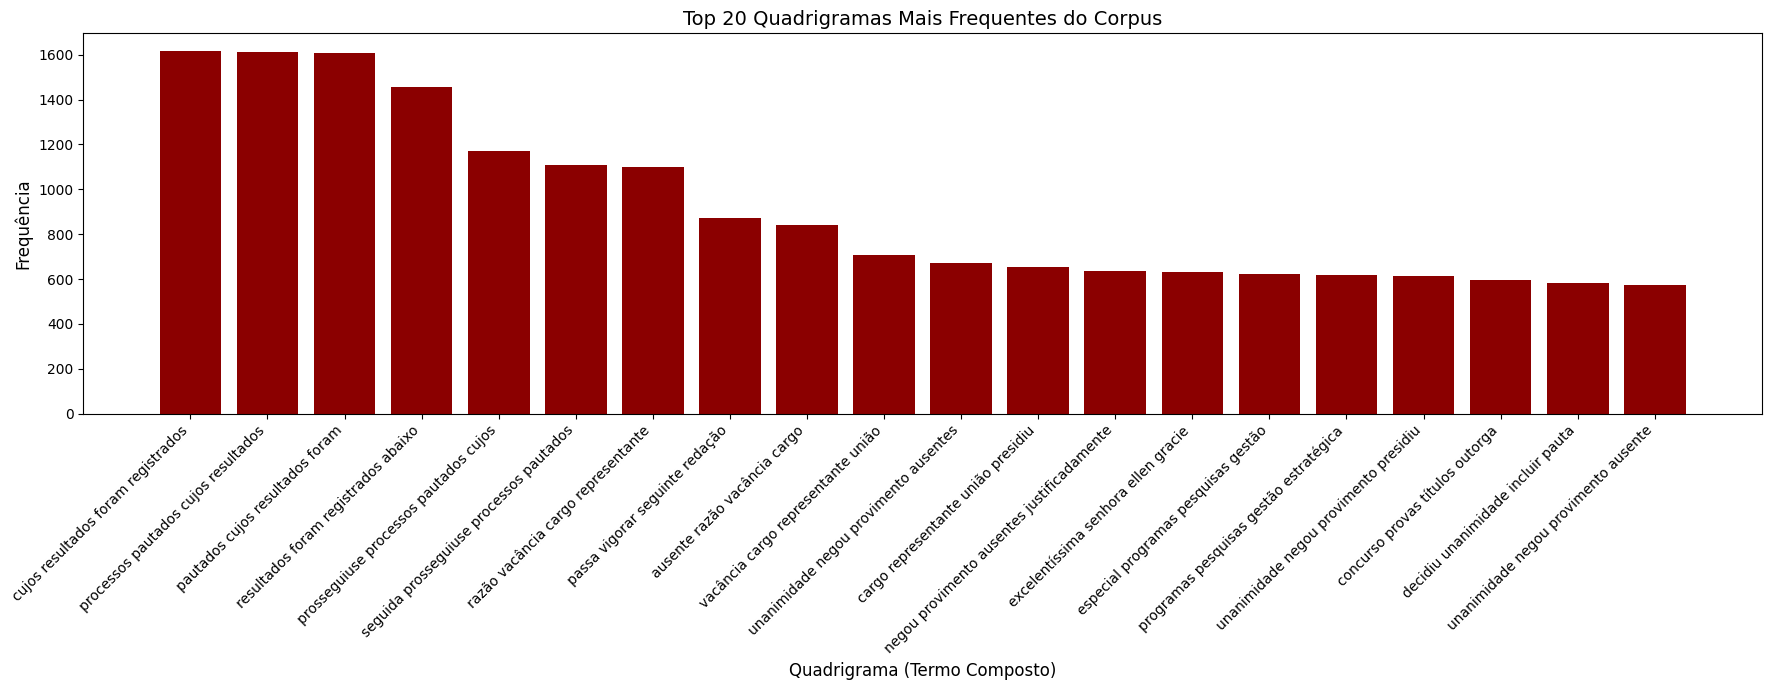

In [35]:
# Cria sequências de quatro palavras consecutivas (quadrigramas)
quadrigramas = list(ngrams(palavras_filtradas, 4))

# 3. Contagem de Frequência dos Quadrigramas
# O Counter irá contar a ocorrência de cada quádrupla
frequencia_quadrigramas = Counter(quadrigramas)

# 4. Exibição dos Top N Quadrigramas (e.g., Top 20)
top_n = 20
df_quadrigramas = pd.DataFrame(
    frequencia_quadrigramas.most_common(top_n),
    columns=['Quadrigrama', 'Frequência']
)

# Converter a tupla do quadrigrama em uma única string para melhor visualização
df_quadrigramas['Termo'] = df_quadrigramas['Quadrigrama'].apply(lambda x: ' '.join(x))

print(f"\n--- Análise de Frequência dos Top {top_n} Quadrigramas ---\n")
# Exibe a tabela
print(df_quadrigramas[['Termo', 'Frequência']].to_string(index=False))

# 5. Visualização em um Gráfico de Barras
plt.figure(figsize=(18, 7))
plt.bar(df_quadrigramas['Termo'], df_quadrigramas['Frequência'], color='darkred')
plt.xlabel('Quadrigrama (Termo Composto)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title(f'Top {top_n} Quadrigramas Mais Frequentes do Corpus', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A análise dos Top 20 Quadrigramas oferece a maior granularidade e a confirmação final da natureza do corpus, que é quase totalmente dedicado aos documentos e deliberações do Conselho Nacional de Justiça (CNJ). Os termos mais frequentes, como "conselho nacional de justiça" e a variante "nacional de justiça cnj", identificam a entidade principal e mostram que a documentação lida frequentemente com a jurisdição estadual ("de justiça do estado" e "tribunal de justiça do"). A presença de frases completas como "procedimento de controle administrativo" e "presidiu o julgamento o" demonstra que o corpus registra as sessões e a tomada de decisões formais, sendo o voto do relator ("nos termos do voto") um elemento central. O termo "corregedoria nacional de justiça" ainda aprofunda o escopo, confirmando que a função correcional e de fiscalização é um tema proeminente no material.

# Análise Descritiva dos metadados

In [29]:
metadata_expanded.head()

,autor,fonte,temas,ementa,origem,apelido,situacao,alteracao,artigo_pai,tipo_chunk,document_id,situacao_stf,identificacao,legislacao_correlata,observacao_cumprdec_consulta
0,Não identificado,"DJE/CNJ n. 209/2025, de 24 de setembro de 2025...",NaN,Dispõe sobre a lavratura e retificação dos ass...,Presidência,---,Vigente,NaN,NaN,Preambulo,https://atos.cnj.jus.br/atos/detalhar/6322,---,Resolução Nº 644 de 22/09/2025,- STF - RJ,SEI n. 00139/2025
1,Não identificado,"DJE/CNJ n. 209/2025, de 24 de setembro de 2025...",NaN,Dispõe sobre a lavratura e retificação dos ass...,Presidência,---,Vigente,NaN,NaN,Considerando,https://atos.cnj.jus.br/atos/detalhar/6322,---,Resolução Nº 644 de 22/09/2025,- STF - RJ,SEI n. 00139/2025
2,Não identificado,"DJE/CNJ n. 209/2025, de 24 de setembro de 2025...",NaN,Dispõe sobre a lavratura e retificação dos ass...,Presidência,---,Vigente,NaN,NaN,Considerando,https://atos.cnj.jus.br/atos/detalhar/6322,---,Resolução Nº 644 de 22/09/2025,- STF - RJ,SEI n. 00139/2025
3,Não identificado,"DJE/CNJ n. 209/2025, de 24 de setembro de 2025...",NaN,Dispõe sobre a lavratura e retificação dos ass...,Presidência,---,Vigente,NaN,NaN,Considerando,https://atos.cnj.jus.br/atos/detalhar/6322,---,Resolução Nº 644 de 22/09/2025,- STF - RJ,SEI n. 00139/2025
4,Não identificado,"DJE/CNJ n. 209/2025, de 24 de setembro de 2025...",NaN,Dispõe sobre a lavratura e retificação dos ass...,Presidência,---,Vigente,NaN,NaN,Considerando,https://atos.cnj.jus.br/atos/detalhar/6322,---,Resolução Nº 644 de 22/09/2025,- STF - RJ,SEI n. 00139/2025


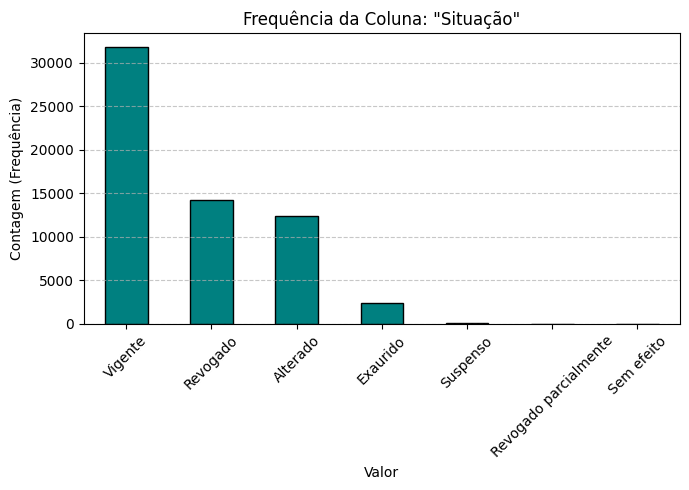

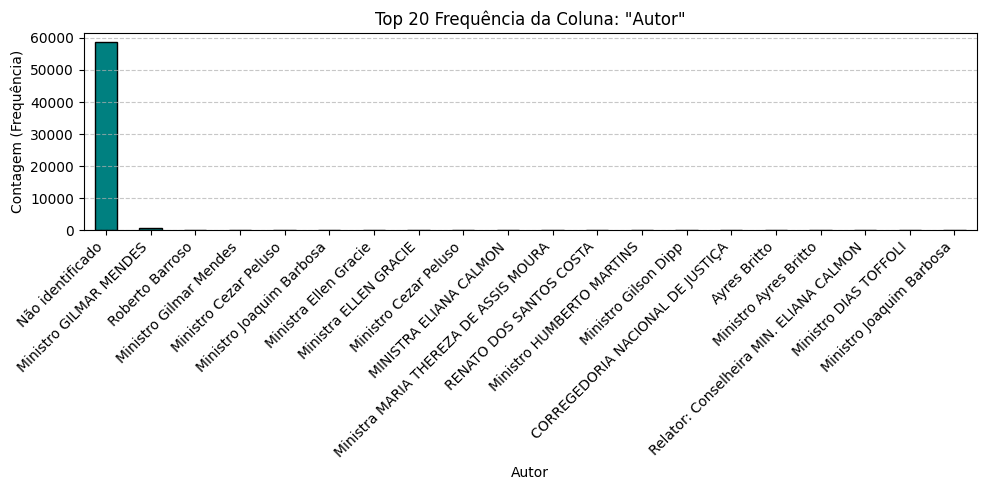

C:\Users\Polo\AppData\Local\Temp\ipykernel_2872\1194253174.py:52: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


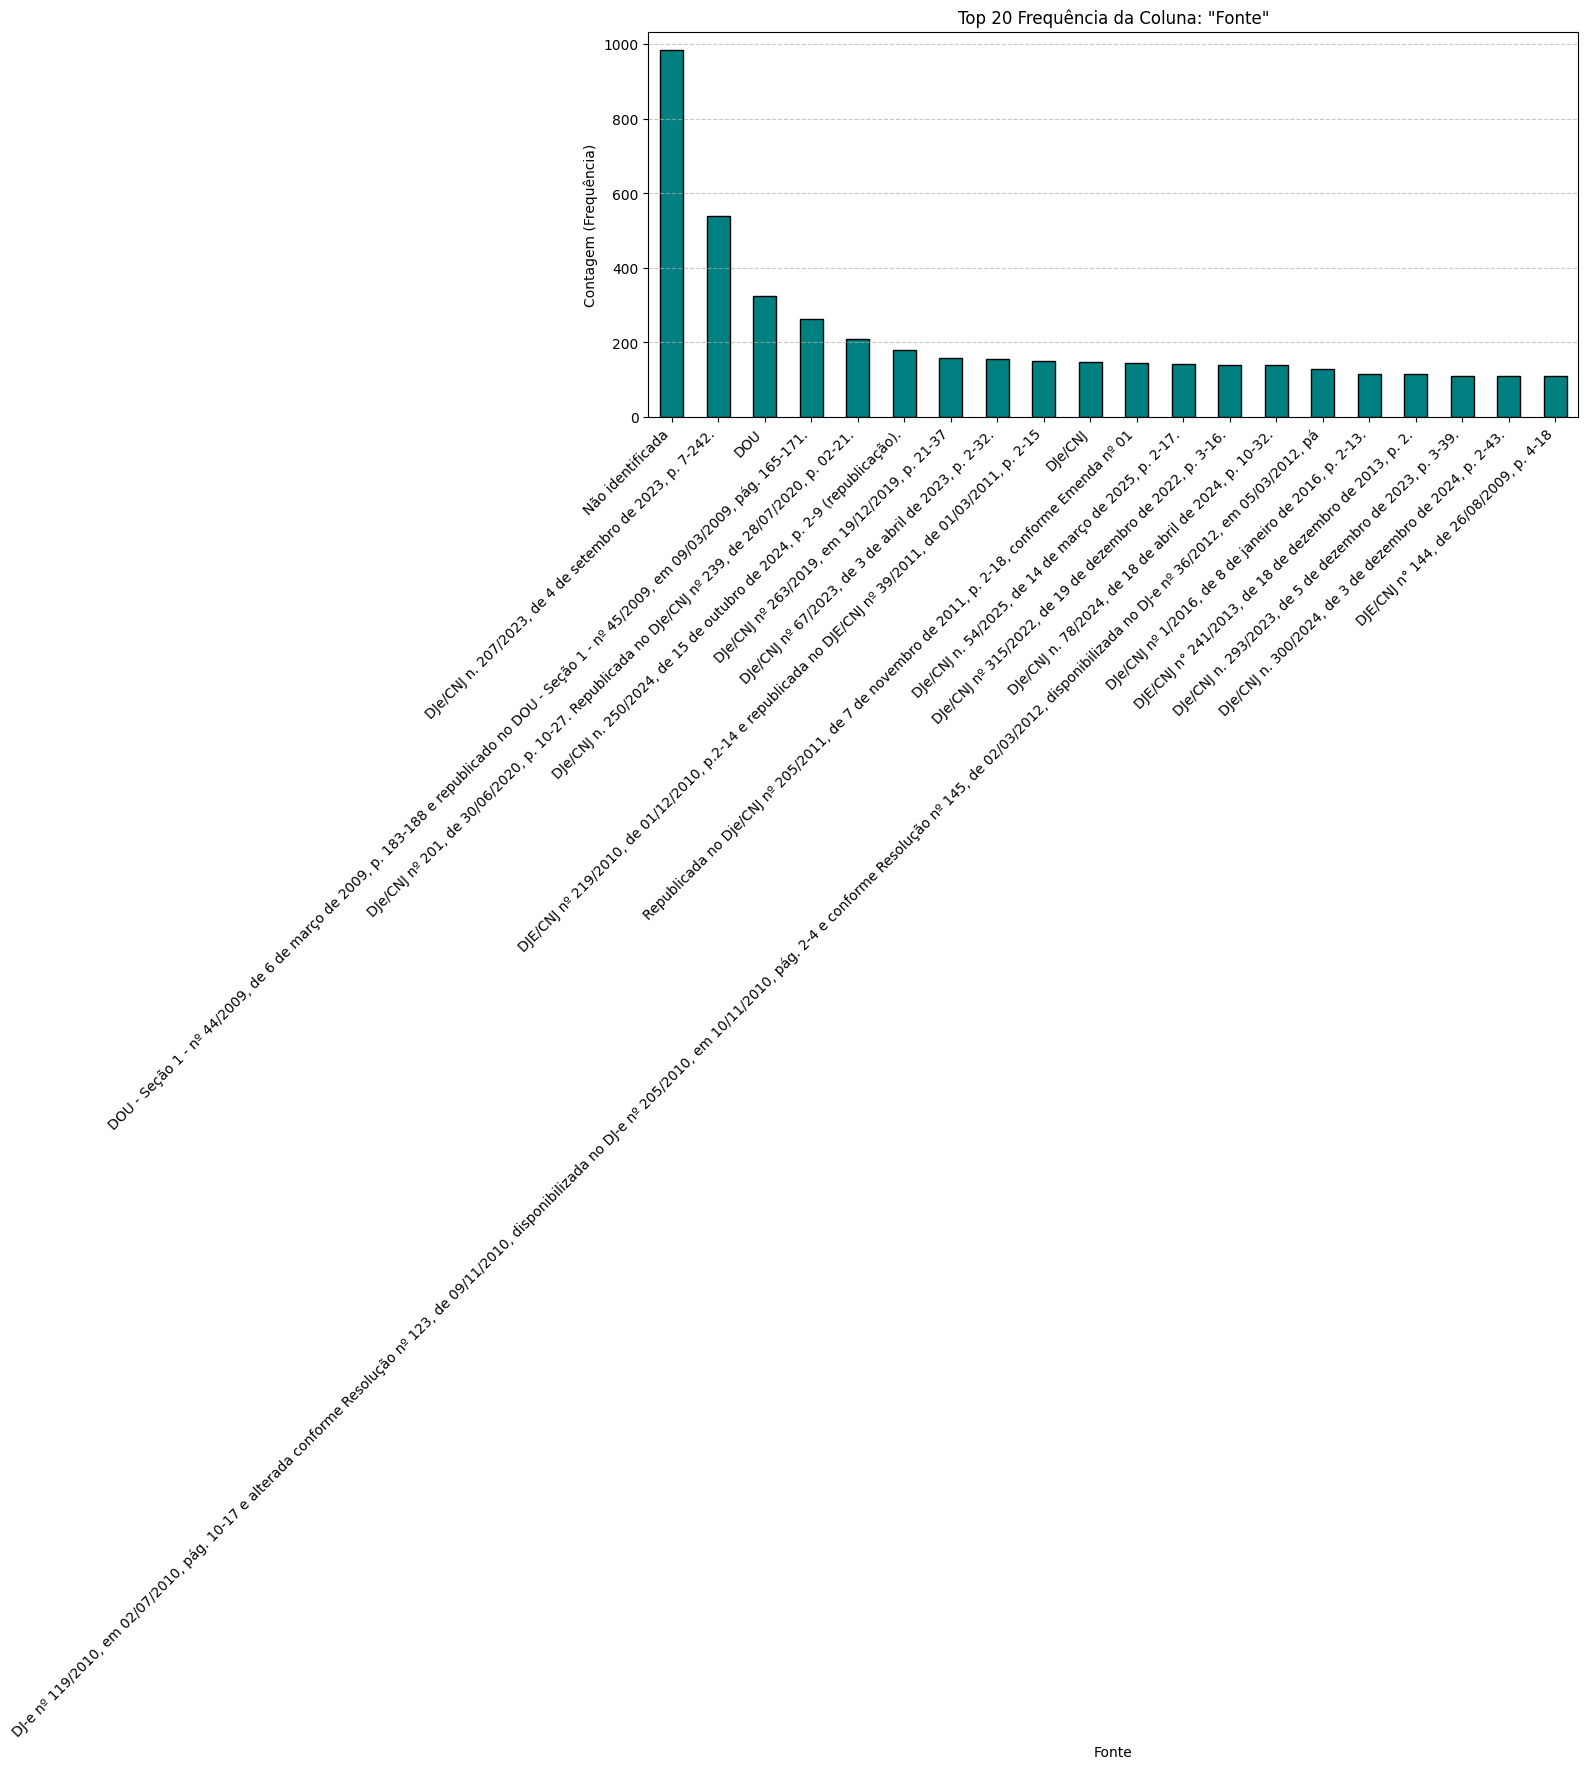

In [36]:
# Gráfico de frequência para a coluna 'situacao'
plt.figure(figsize=(7, 5))
frequencia_situacao = metadata_expanded['situacao'].value_counts()
frequencia_situacao.plot(
    kind='bar',
    color='teal',
    edgecolor='black'
)
plt.title('Frequência da Coluna: "Situação"', fontsize=12)
plt.xlabel('Valor', fontsize=10)
plt.ylabel('Contagem (Frequência)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('grafico_frequencia_situacao.png')
plt.show()
plt.close()

# Gráfico de frequência para o top 20 da coluna 'autor'
plt.figure(figsize=(10, 5))
frequencia_autor = metadata_expanded['autor'].value_counts().head(20)
frequencia_autor.plot(
    kind='bar',
    color='teal',
    edgecolor='black'
)
plt.title('Top 20 Frequência da Coluna: "Autor"', fontsize=12)
plt.xlabel('Autor', fontsize=10)
plt.ylabel('Contagem (Frequência)', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('grafico_frequencia_autor_top20.png')
plt.show()
plt.close()

# Gráfico de frequência para o top 20 da coluna 'fonte'
plt.figure(figsize=(12, 5))
# Substitui "-" por "Não identificada" antes de calcular as frequências
fonte_corrigida = metadata_expanded['fonte'].replace("-", "Não identificada")
frequencia_fonte = fonte_corrigida.value_counts().head(20)
frequencia_fonte.plot(
    kind='bar',
    color='teal',
    edgecolor='black'
)
plt.title('Top 20 Frequência da Coluna: "Fonte"', fontsize=12)
plt.xlabel('Fonte', fontsize=10)
plt.ylabel('Contagem (Frequência)', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('grafico_frequencia_fonte_top20.png')
plt.show()
plt.close()


Os três gráficos de frequência revelam aspectos cruciais sobre a distribuição dos dados nas colunas "Situação", "Autor" e "Fonte". A coluna "Situação" apresenta um desequilíbrio claro, com a grande maioria dos registros classificados como "Vigente" (mais de 30.000), seguido por "Revogado" e "Alterado", e com as demais categorias ("Exaurido," "Suspenso," etc.) representando uma porção mínima do total. Já o gráfico da coluna "Autor" mostra uma concentração de dados ainda mais extrema, onde a categoria "Não identificado" domina completamente (aproximadamente 58.000 ocorrências), seguida a grande distância por "Ministro GILMAR MENDES," indicando que a autoria é desconhecida ou não registrada para quase todo o conjunto de dados. Por fim, a coluna "Fonte" também está desequilibrada, com a categoria "Não identificada" sendo a mais comum (próxima de 1.000 ocorrências), mas aqui há uma variedade maior de fontes específicas — muitas delas referências de publicações do Diário Oficial (DOU) — que, embora com contagens menores individualmente, compõem a maior parte dos dados identificados.

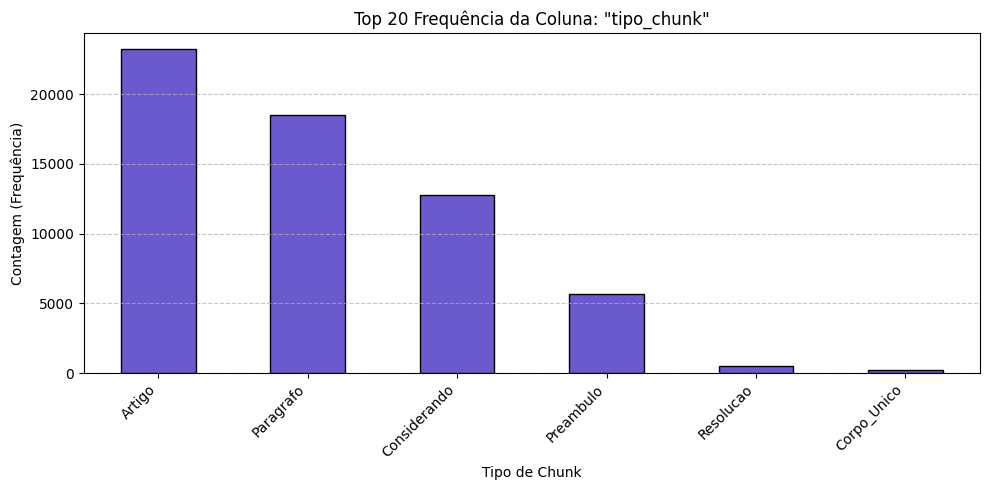

In [37]:
# Gráfico de frequência para o top 20 da coluna 'tipo_chunk'
plt.figure(figsize=(10, 5))
frequencia_tipo_chunk = metadata_expanded['tipo_chunk'].value_counts().head(20)
frequencia_tipo_chunk.plot(
    kind='bar',
    color='slateblue',
    edgecolor='black'
)
plt.title('Top 20 Frequência da Coluna: "tipo_chunk"', fontsize=12)
plt.xlabel('Tipo de Chunk', fontsize=10)
plt.ylabel('Contagem (Frequência)', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('grafico_frequencia_tipo_chunk_top20.png')
plt.show()
plt.close()
